In [1]:
import sun_blinker
import importlib
importlib.reload(sun_blinker)
import sunpy
import sunpy.map
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
%matplotlib widget
from mpl_animators import ArrayAnimatorWCS, ArrayAnimator, ImageAnimator
import astropy.wcs
from sunpy.time import parse_time
plt.rcParams["animation.html"] = "jshtml"

In [2]:
aia_193_map = sunpy.map.Map("../../src/AIA/20221022/193/lvl15/aia_lev15_193a_2022_10_22t19_15_04_85z_image_lev15.fits")
aia_171_map = sunpy.map.Map("../../src/AIA/20221022/171/lvl15/aia_lev15_171a_2022_10_22t19_14_57_35z_image_lev15.fits")

In [3]:
aia_193_map_crop = aia_193_map.submap(SkyCoord(-900*u.arcsec,-100*u.arcsec,frame=aia_193_map.coordinate_frame),
                                        top_right=SkyCoord(-500*u.arcsec,600*u.arcsec,frame=aia_193_map.coordinate_frame))

aia_171_map_crop = aia_171_map.submap(SkyCoord(-900*u.arcsec,-100*u.arcsec,frame=aia_171_map.coordinate_frame),
                                        top_right=SkyCoord(-500*u.arcsec,600*u.arcsec,frame=aia_171_map.coordinate_frame))

In [4]:
aia_171_map_crop_repro = aia_171_map_crop.reproject_to(aia_193_map_crop.wcs)

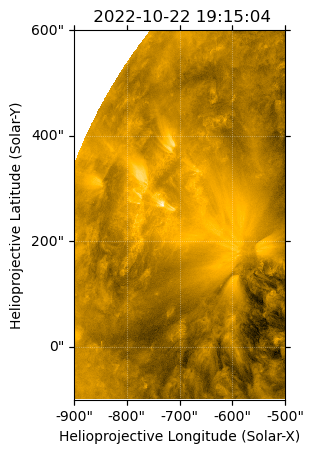

In [5]:
%matplotlib inline
importlib.reload(plt)
%matplotlib inline
aia_171_map_crop_repro.plot()

In [6]:
sun_blinker.SunBlinker(aia_193_map_crop,aia_171_map_crop_repro)